In [1]:
from math import sqrt
import pandas as pd
import numpy as np

from pathlib import Path
from collections import defaultdict
import pickle
import gc

from tqdm import tqdm
from pandarallel import pandarallel

from scipy.sparse import csr_matrix, coo_matrix
import implicit
import catboost

import sys
sys.path.append("..")
from src.utils import *
from src.dataset import *
from src.trending import *

from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from catboost import Pool, CatBoostClassifier, cv
from catboost.utils import get_roc_curve, create_cd
from catboost.eval.catboost_evaluation import CatboostEvaluation

pd.set_option('display.max_colwidth', 255)
tqdm.pandas()
pandarallel.initialize(progress_bar=True, nb_workers=8, use_memory_fs=False)

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [2]:
SEED = 1
N = 12
TEST_ON = 1

cv_iteration = 0

dataset = Dataset(skip_days=7 * cv_iteration, test_days=7 * TEST_ON)
train, test = dataset.get_train_and_test()
articles = dataset.get_articles()
customers = dataset.get_customers()
print("Dataset created")

del train
gc.collect()

Dataset created


0

In [3]:
img = plt.imread("../input/images/010/0108775015.jpg")

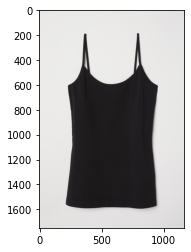

In [4]:
plt.imshow(img)

In [15]:
from tensorflow.keras.applications.vgg16 import VGG16

In [18]:
model = VGG16(weights='imagenet', include_top=True)
model.summary()

553476096/553467096 [==============================] - 50s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
___________________________________________________________

In [11]:
img.shape

(1750, 1166, 3)

In [17]:
model.predict(np.array([img])).shape

(1, 54, 36, 512)